In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import MonthEnd
import warnings 

warnings.filterwarnings('ignore')

In [2]:
# Leitura
dados_csv = pd.read_csv("./base25062.csv", sep=';')

In [24]:
dados_csv.iloc[123]['Data Início Planejado'] = '06/09/2023'

In [25]:
# Convertendo as colunas de datas para o tipo correto
for coluna_data in ['Data Início Planejado', 'Data Fim Planejado', 'Data Início Real', 'Data Fim Real']:
    if coluna_data in dados_csv.columns:
        dados_csv[coluna_data] = pd.to_datetime(dados_csv[coluna_data], format='%d/%m/%Y', errors='coerce')
    else:
        print(f"A coluna '{coluna_data}' não está presente no DataFrame.")

In [26]:
# Inicializa o dicionário que armazenará os dados dos projetos com os nomes das colunas corretos
data_projetos = {
    'Cliente': [],
    'Projeto': [],
    'Atividade': [],
    'Head': [],
    'Responsavel': [],
    'Data Início Planejado': [],
    'Esforco': [],
    'Data Fim Planejado': [],
    'Data Início Real': [],
    'Data Fim Real': [],
    'Finalizado': [],
    'Status': []
}

In [27]:
# Função para adicionar dados de uma linha do DataFrame ao dicionário
def adicionar_linha_ao_dicionario(row):
    data_projetos['Cliente'].append(row['Cliente'])
    data_projetos['Projeto'].append(row['Projeto'])
    data_projetos['Atividade'].append(row['Atividade'])
    data_projetos['Responsavel'].append(row['Responsavel'])
    data_projetos['Data Início Planejado'].append(row['Data Início Planejado'])
    data_projetos['Data Fim Planejado'].append(row['Data Fim Planejado'])
    data_projetos['Data Início Real'].append(row['Data Início Real'])
    data_projetos['Data Fim Real'].append(row['Data Fim Real'])
    data_projetos['Finalizado'].append(row['Finalizado'])
    data_projetos['Status'].append(row['Status'])

# Iterar sobre cada linha do DataFrame e adicionar ao dicionário
for _, row in dados_csv.iterrows():
    adicionar_linha_ao_dicionario(row)

# Criar um DataFrame com os dados do dicionário
df_projetos = pd.DataFrame(data_projetos)


ValueError: All arrays must be of the same length

In [ ]:
# df_projetos = pd.read_csv('caminho_para_o_seu_arquivo.csv')

# Certifique-se de que as colunas de data estão no formato datetime
df_projetos['Data Fim Planejado'] = pd.to_datetime(df_projetos['Data Fim Planejado'])
df_projetos['Data Fim Real'] = pd.to_datetime(df_projetos['Data Fim Real'])

# Função para calcular o atraso
def calcular_atraso(fim_planejado, fim_real):
    if fim_real > fim_planejado:
        return (fim_real - fim_planejado).days
    else:
        return 0

# Aplicar a função calcular_atraso e criar a coluna 'Atraso'
df_projetos['Atraso'] = df_projetos.apply(lambda row: calcular_atraso(
    row['Data Fim Planejado'], row['Data Fim Real']
), axis=1)

# Agregar os dados apenas pela coluna 'Projeto'
resultado_agregado = df_projetos.groupby('Projeto')['Atraso'].max()

# Exibir o DataFrame agregado
print(resultado_agregado)

Projeto
Automação de processos                     14
BOT                                         0
BOT MBA                                     0
Biolab                                      0
Centro de Custo                             0
ChatBOT                                     0
Danone                                     14
Desenvolvimento BOT                         0
Envio de informações                        0
Homologação Bot                             0
Implantação                                 0
Implantação - Sicoob Centro Oeste           0
Implantação Angeza                          0
Implantação Atmo energia                    3
Implantação Dallo                           0
Implantação KeyAccess                       6
Implantação MrJack                          0
Implantação Mundo 365                       0
Implantação NOVO CRM Viacerta               0
Implantação Nossa Coop                      0
Implantação Paag.IO                         0
Implantação Pascholotto   

In [ ]:
resultado_agregado.max()

77

In [ ]:
# Função para calcular desvio de prazo
def calcular_desvio_prazo(row):
    inicio_planejado = pd.to_datetime(row['Data Início Planejado'], format='%d/%m/%Y')
    fim_planejado = pd.to_datetime(row['Data Fim Planejado'], format='%d/%m/%Y')
    inicio_real = pd.to_datetime(row['Data Início Real'], format='%d/%m/%Y')
    fim_real = pd.to_datetime(row['Data Fim Real'], format='%d/%m/%Y')

    # Verifica se as datas são válidas, caso contrário retorna None
    if pd.isnull(inicio_planejado) or pd.isnull(fim_planejado) or pd.isnull(inicio_real) or pd.isnull(fim_real):
        return pd.Series([None, None], index=['DiasReais', 'DesvioPrazo'])

    total_dias_planejados = (fim_planejado - inicio_planejado).days
    total_dias_reais = (fim_real - inicio_real).days

    return pd.Series([total_dias_reais, total_dias_reais - total_dias_planejados], index=['DiasReais', 'DesvioPrazo'])

# Supondo que 'df_projetos' seja o seu DataFrame com as colunas apropriadas
# df_projetos = pd.read_csv('caminho_para_o_seu_arquivo.csv') # Se você estiver lendo de um CSV

# Aplicar a função a cada linha do DataFrame
resultados = df_projetos.apply(calcular_desvio_prazo, axis=1)

# Concatenar os resultados ao DataFrame original
df_projetos = pd.concat([df_projetos, resultados], axis=1)


In [ ]:
df_projetos

,Cliente,Projeto,Atividade,Head,Responsavel,Data Início Planejado,Esforco,Data Fim Planejado,Data Início Real,Data Fim Real,Finalizado,Status,Atraso,DiasReais,DesvioPrazo
0,AGF,BOT MBA,Clonar o bot main para um bot MBA,Luiz,Rafael Mendes,2023-07-06,1,2023-07-07,2023-07-05,2023-07-05,100%,Concluído,0,0.0,-1.0
1,AGF,BOT MBA,Ajuste de gatilhos,Luiz,Rafael Mendes,2023-07-06,1,2023-07-07,2023-06-05,2023-06-09,100%,Concluído,0,4.0,3.0
2,AGF,BOT MBA,Configurar email IMAP,Luiz,Suporte,2023-07-06,1,2023-07-07,2023-06-05,2023-06-07,100%,Concluído,0,2.0,1.0
3,AGF,BOT MBA,Enviar pesquisa de satisfação,Alyne,Matheus Almeida,2023-07-24,0,2023-07-24,2023-07-24,2023-07-24,100%,Concluído,0,0.0,0.0
4,AGF,BOT MBA,Aceite escopo,Alyne,Matheus Almeida,2023-07-06,0,2023-07-06,2023-07-06,2023-07-06,100%,Concluído,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaT,NaN,Atrasado,0,NaN,NaN
359,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaT,NaN,Atrasado,0,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaT,NaN,Atrasado,0,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaT,NaN,Atrasado,0,NaN,NaN


In [ ]:
# Média de tempo por projeto
media_tempo_por_projeto = df_projetos['DiasReais'].mean()

In [ ]:
# Média de tempo por mês
df_projetos['Mes'] = df_projetos['Data Início Planejado'].dt.to_period('M').dt.to_timestamp()
df_projetos['Mes'] = df_projetos['Mes'].dt.strftime('%Y-%m')
media_tempo_por_mes = df_projetos.groupby('Mes')['DiasReais'].mean()

In [ ]:
print("Média de tempo por projeto:")
print(media_tempo_por_projeto)

print("\nMédia de tempo por mês:")
print(media_tempo_por_mes) 

Média de tempo por projeto:
7.088888888888889

Média de tempo por mês:
Mes
2023-05     1.000000
2023-06    14.500000
2023-07     6.238095
2023-08     9.458333
2023-09     6.237288
2023-10     4.073171
2023-11     0.000000
2023-12          NaN
2024-03          NaN
Name: DiasReais, dtype: float64


In [ ]:
df_projetos.to_excel('base_final.xlsx', index=False)

<Axes: xlabel='Mes'>

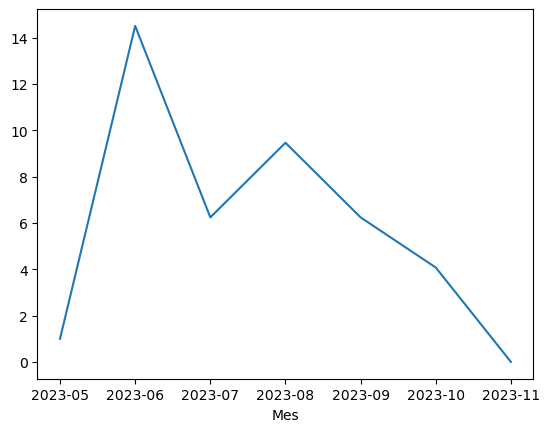

In [ ]:
media_tempo_por_mes.plot()